In [32]:
%load_ext autoreload
%autoreload 2
import sys
if "../" not in sys.path:
    sys.path.append("../")
import os
import json

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product

from volterra_hawkes.iVi.iVi_hawkes import IVIHawkesProcess
from volterra_hawkes.kernel.kernels import *
from volterra_hawkes.utility.visualisation import Experiment, get_N_U_sample, get_arrivals_sample, plot_trajectories, plot_marginal_laws, poisson_jumps_test

plt.style.use('seaborn-v0_8-deep')
plt.style.use('default')  # 'default' or any other light theme like 'seaborn-white'

color_cycle = ["#B56246", "#579F40", "#9A46B5", "#4699B5", "#B54662", "#D4A017", "#5b6c64", "#71074E", "#0033A0"]
plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 5, 5)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True
plt.rcParams['axes.prop_cycle']       = matplotlib.cycler(color=color_cycle)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiment choice: Visualisation of the trajectories

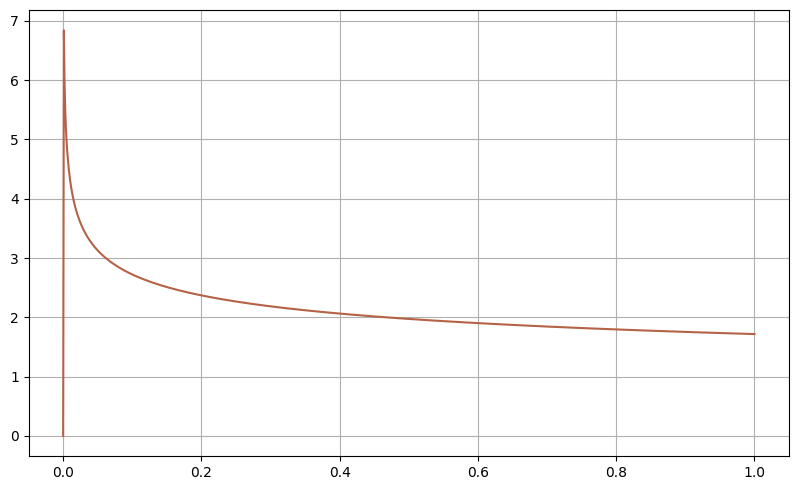

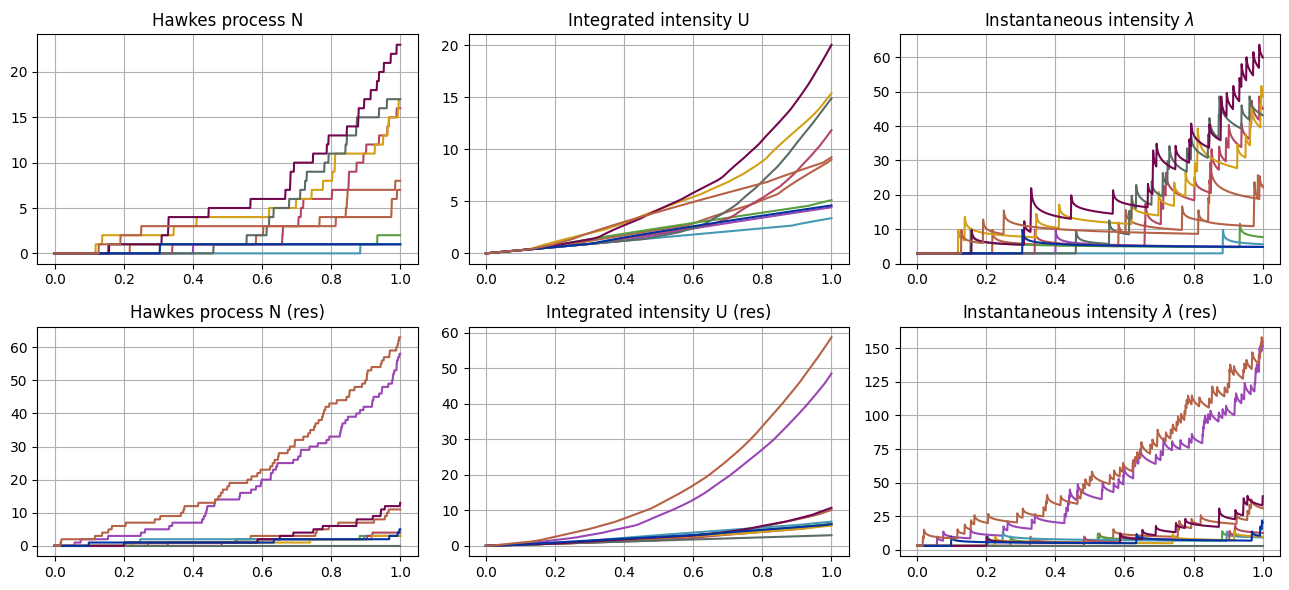

In [33]:
# mu = 3
# H = 0.3
# lam = 1
# c = 2
# alpha = 2

# T = 1
# n_steps = 1000

# rng = np.random.default_rng(seed=42)

#K = ConstantKernel(c=3)
#K = FractionalKernel(H=H, c=c)
#K = ExponentialKernel(c=c, lam=lam)
#K = GammaKernel(lam=lam, alpha=alpha, c=lam**alpha)
e = Experiment(
    T=1,
    n_steps = 1000,
    kernel = FractionalKernel(H=0.3, c=2),
    mu=3
)

# lam = 5
# alpha = 2
# t0 = (alpha - 1) / lam
# gamma_kernel = GammaKernel(lam=5, alpha=2, c=5**2 * 0.95)
# e = Experiment(
#     T=1,
#     n_steps = 20,
#     kernel = gamma_kernel,
#     decreasing_kernel=lambda t: gamma_kernel(t) * (t > t0) + gamma_kernel(t0) * (t <= t0),
#     mu=3
# )

# e = Experiment(
#     T=0.5,
#     n_steps = 10,
#     kernel = ConstantKernel(c=2),
#     mu=3
# )

plt.plot(e.t_grid, e.kernel(e.t_grid))
plot_trajectories(e)


In [34]:
path = "../experiments/"

path_experiment = path + str(e) + "/"
str(path_experiment)

try:
    os.mkdir(path_experiment)
except FileExistsError as _:
    pass

experiment_results = dict()

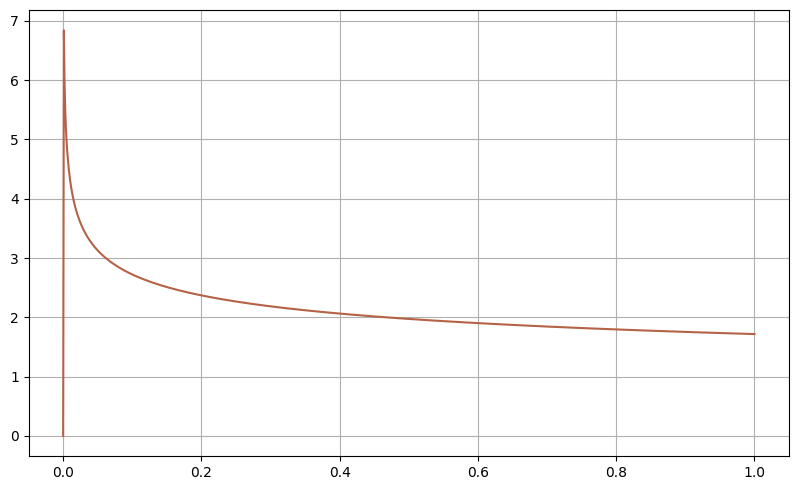

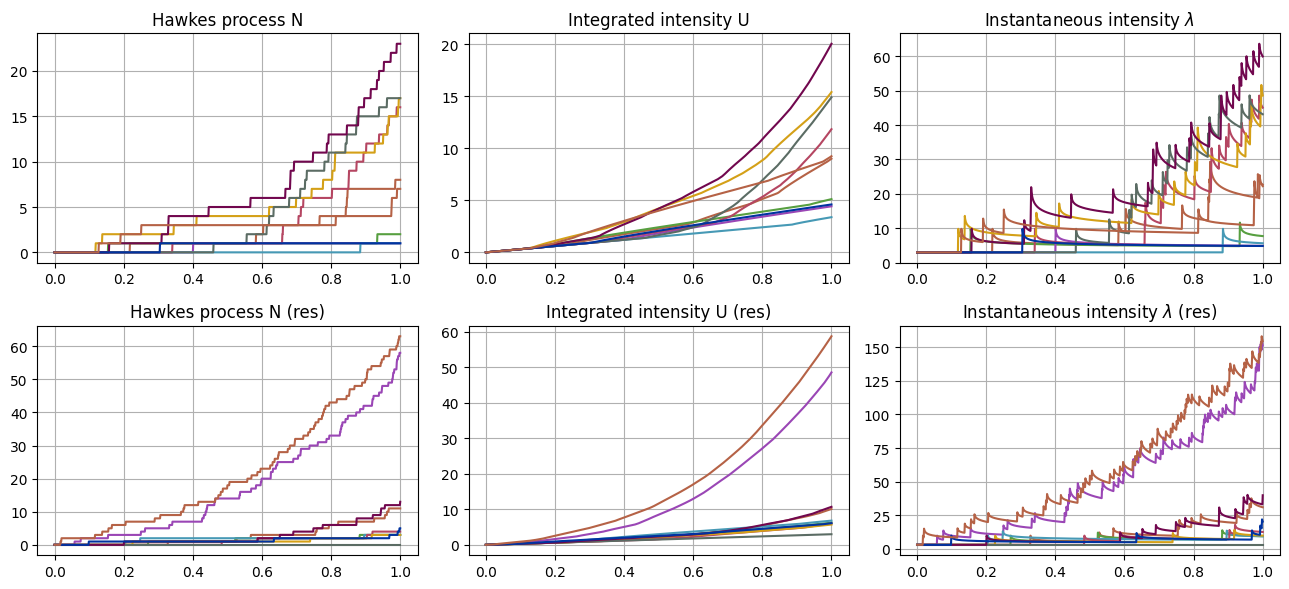

In [35]:
# test 0: plot the kernel and sample trajectories
fig, ax = plt.subplots()
ax.plot(e.t_grid, e.kernel(e.t_grid))
fig.savefig(path_experiment + "kernel.pdf", format="pdf", bbox_inches="tight", transparent=True)

plot_trajectories(e, path=path_experiment + "sample_trajectories.pdf")

In [36]:
# test 1: compute E[N_T]
rng = np.random.default_rng(seed=42)
ivi_hawkes = IVIHawkesProcess(kernel=e.kernel, g0_bar=e.g0_bar, rng=rng, g0=e.g0)
expected_U = ivi_hawkes.U_mean(t_grid=np.linspace(e.t_grid[0], e.t_grid[-1], 1000))
experiment_results["mean_N_T"] = expected_U[-1]
print("Mean:", experiment_results["mean_N_T"])

15.093149509113466


p-value Population-Ogata: 0.1856663803254565
KstestResult(statistic=0.0218, pvalue=0.1856663803254565, statistic_location=3.7532683363386177, statistic_sign=1)
p-value Population-iVi: 0.3035775745288207
KstestResult(statistic=0.0194, pvalue=0.3035775745288207, statistic_location=11.247760289596558, statistic_sign=-1)
p-value Population-Res iVi: 0.03750845908615294
KstestResult(statistic=0.0282, pvalue=0.03750845908615294, statistic_location=2.9994842710852034, statistic_sign=1)
p-value Population-Ogata: 0.039677110232779096
KstestResult(statistic=0.028, pvalue=0.039677110232779096, statistic_location=1, statistic_sign=1)
p-value Population-iVi: 0.0046883725566174775
KstestResult(statistic=0.0348, pvalue=0.0046883725566174775, statistic_location=5.0, statistic_sign=-1)
p-value Population-Res iVi: 0.020914947385416365
KstestResult(statistic=0.0302, pvalue=0.020914947385416365, statistic_location=4.0, statistic_sign=-1)


C:\Users\DM6579\OneDrive - ENGIE\projects\volterra_hawkes\volterra_hawkes\iVi\iVi.py:58: UserWarning: Negative alpha encountered in iVi Res scheme. Setting to 0.
  warnings.warn(f"Negative alpha encountered in {scheme_name} scheme. Setting to 0.")


p-value Population-Ogata: 0.1856663803254565
KstestResult(statistic=0.0218, pvalue=0.1856663803254565, statistic_location=3.7532683363386177, statistic_sign=1)
p-value Population-iVi: 2.513986969863627e-12
KstestResult(statistic=0.074, pvalue=2.513986969863627e-12, statistic_location=7.851369779320325, statistic_sign=-1)
p-value Population-Res iVi: 1.5977384060169805e-30
KstestResult(statistic=0.1176, pvalue=1.5977384060169805e-30, statistic_location=2.9958442464776933, statistic_sign=1)
p-value Population-Ogata: 0.039677110232779096
KstestResult(statistic=0.028, pvalue=0.039677110232779096, statistic_location=1, statistic_sign=1)
p-value Population-iVi: 3.7768907372193455e-102
KstestResult(statistic=0.2156, pvalue=3.7768907372193455e-102, statistic_location=14.0, statistic_sign=-1)
p-value Population-Res iVi: 8.741308377838615e-14
KstestResult(statistic=0.0784, pvalue=8.741308377838615e-14, statistic_location=1.9999999999999998, statistic_sign=1)
p-value Population-Ogata: 0.1856663803

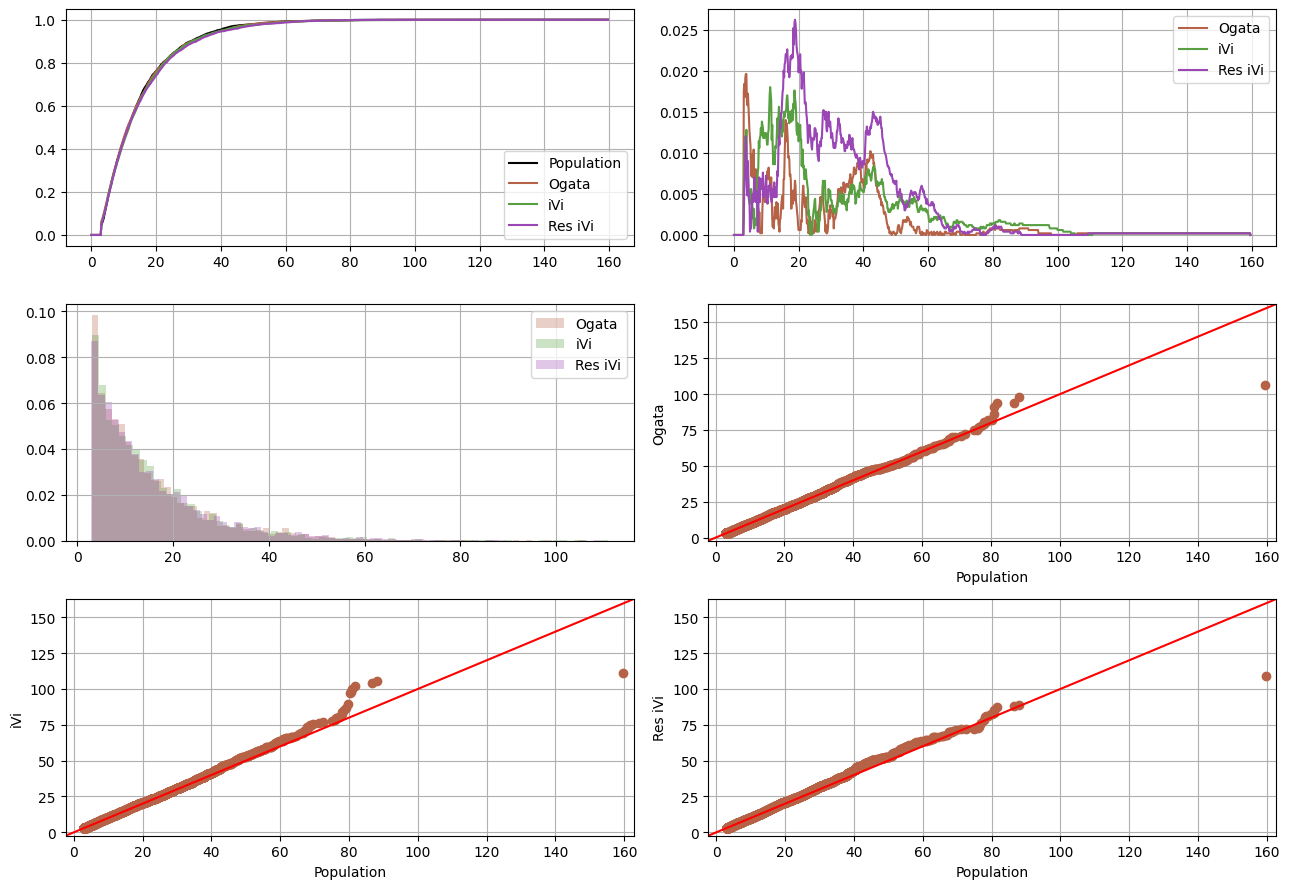

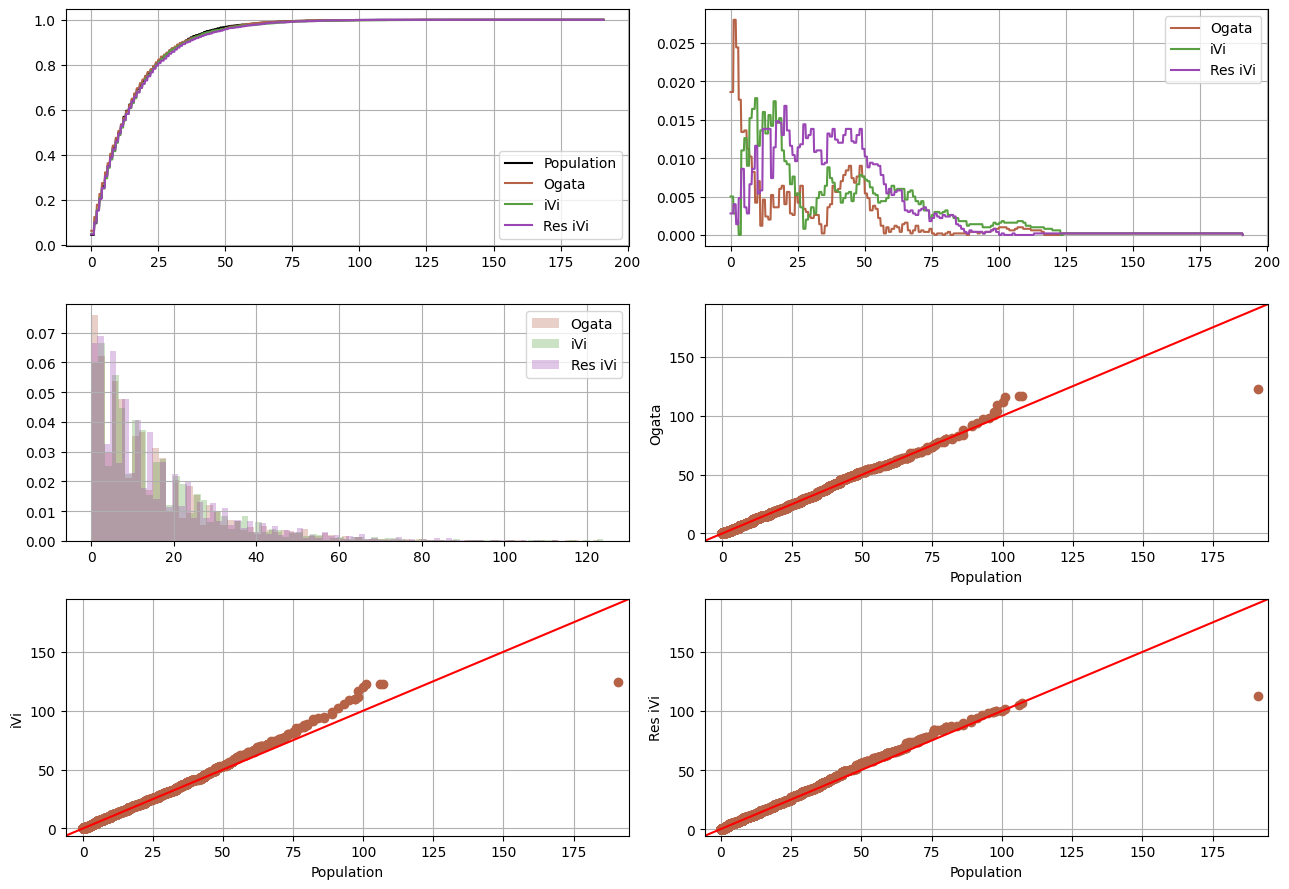

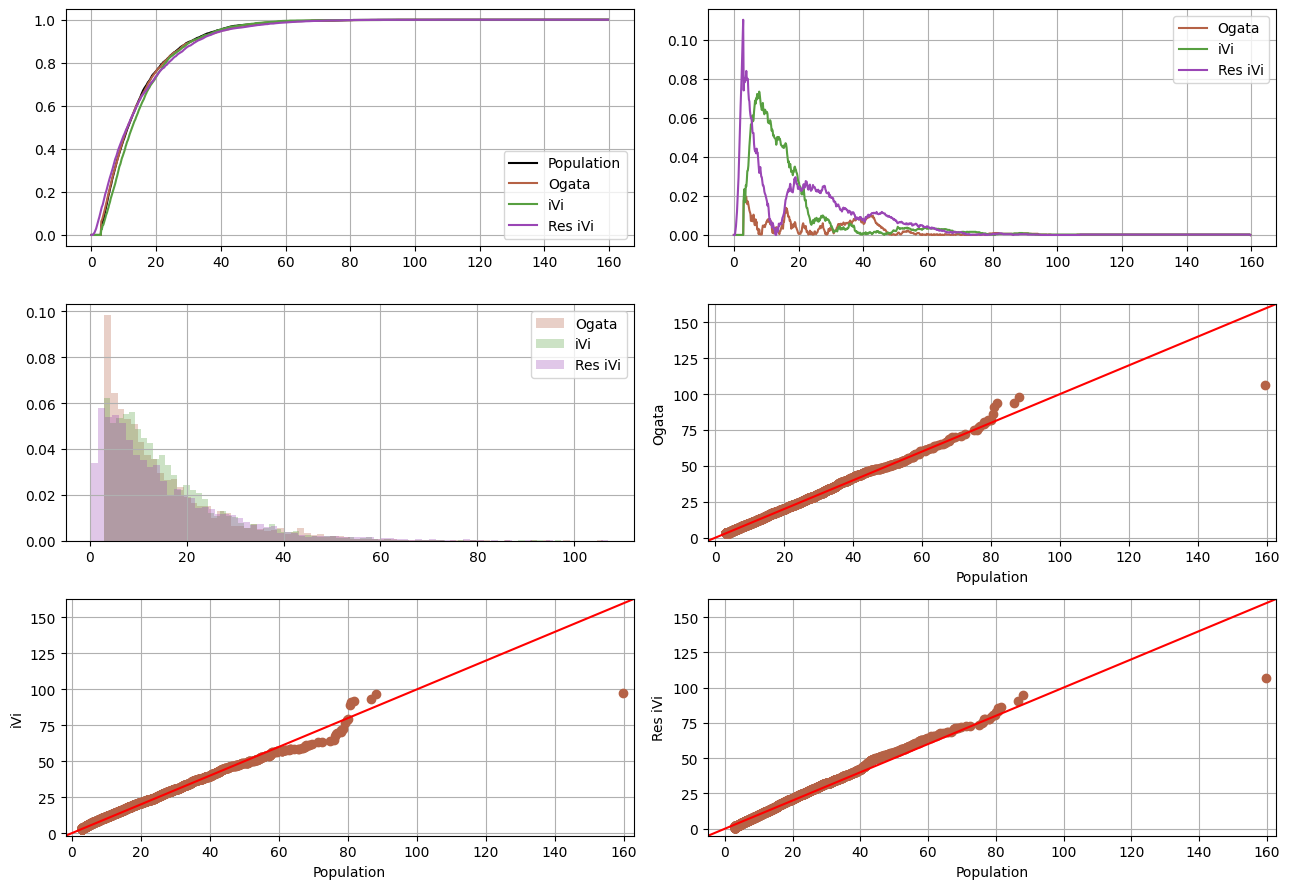

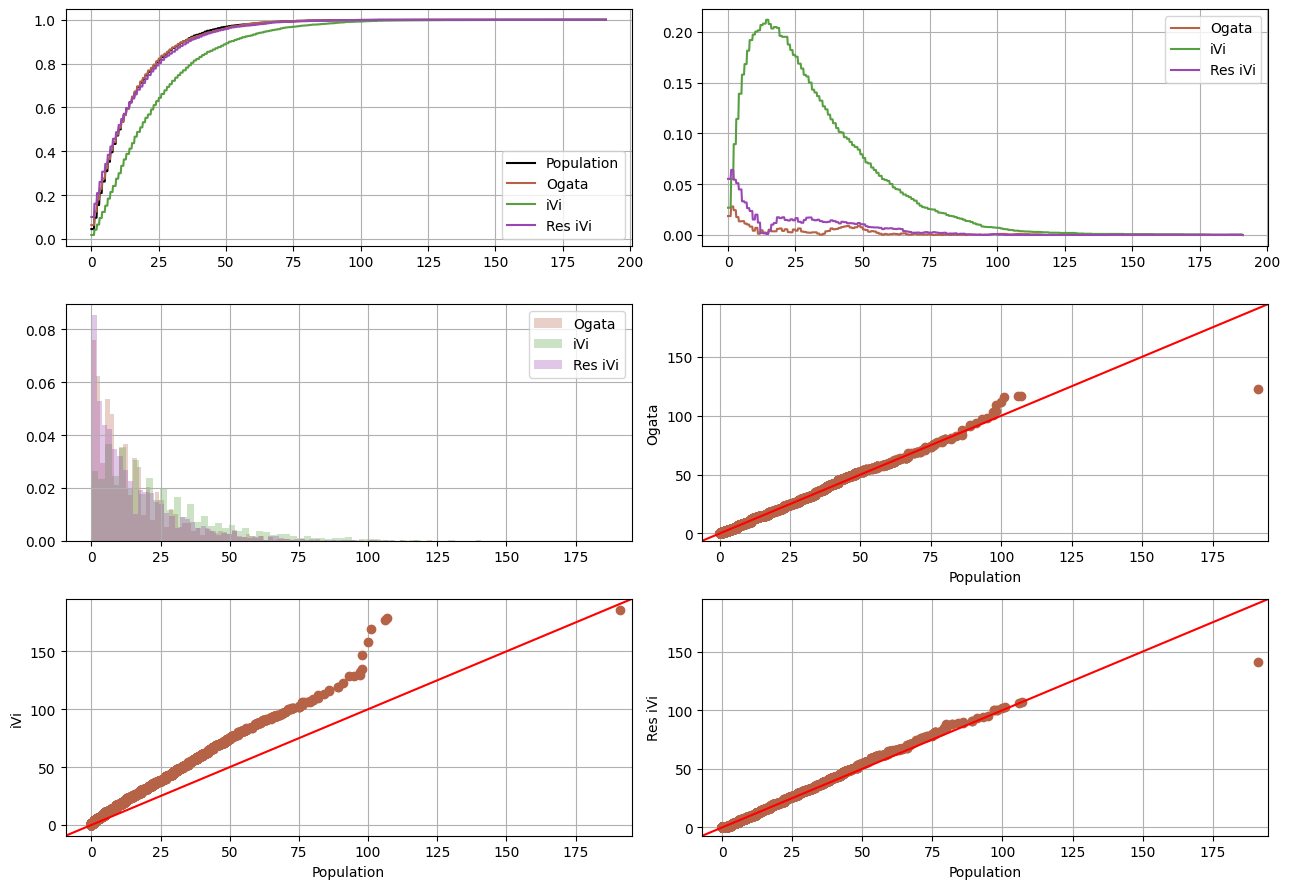

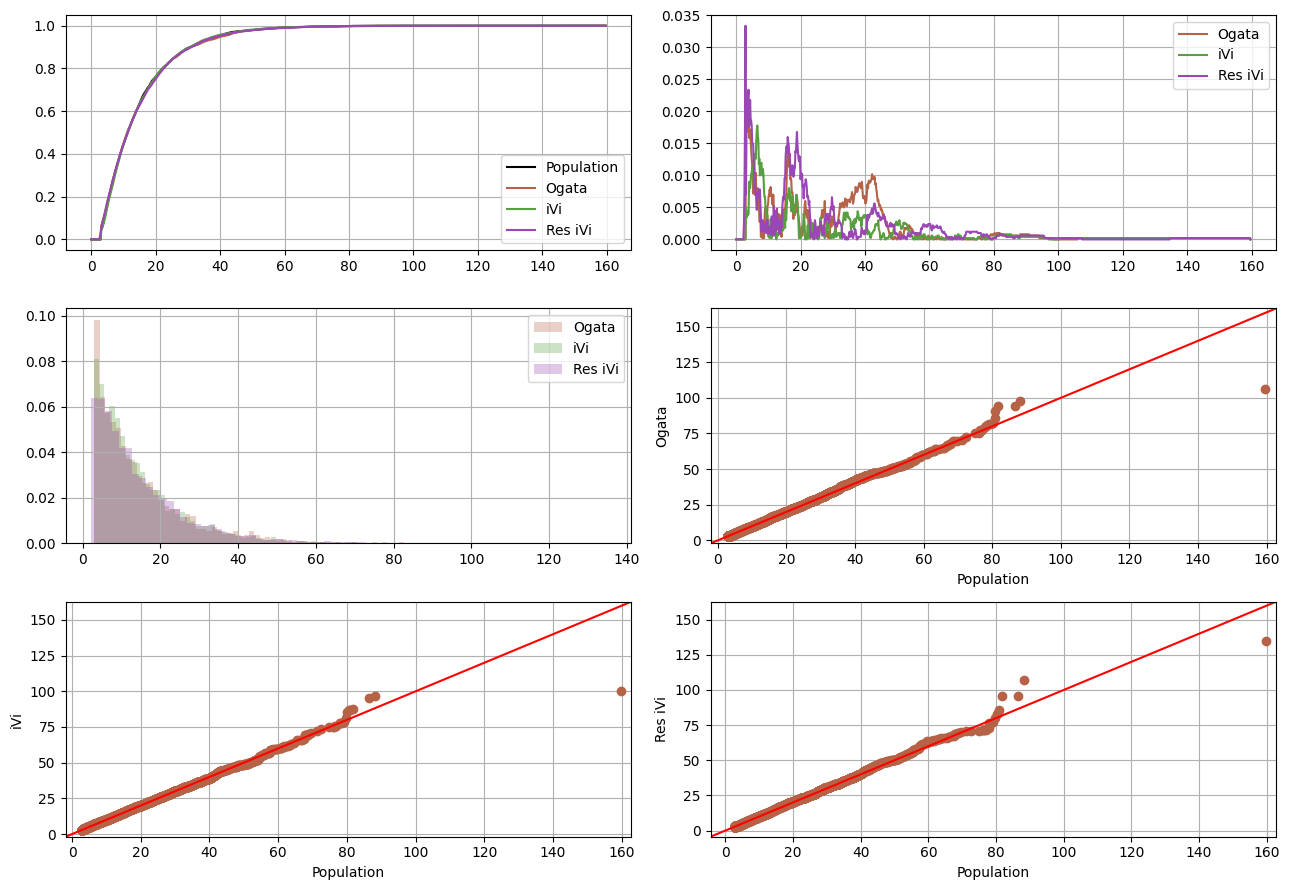

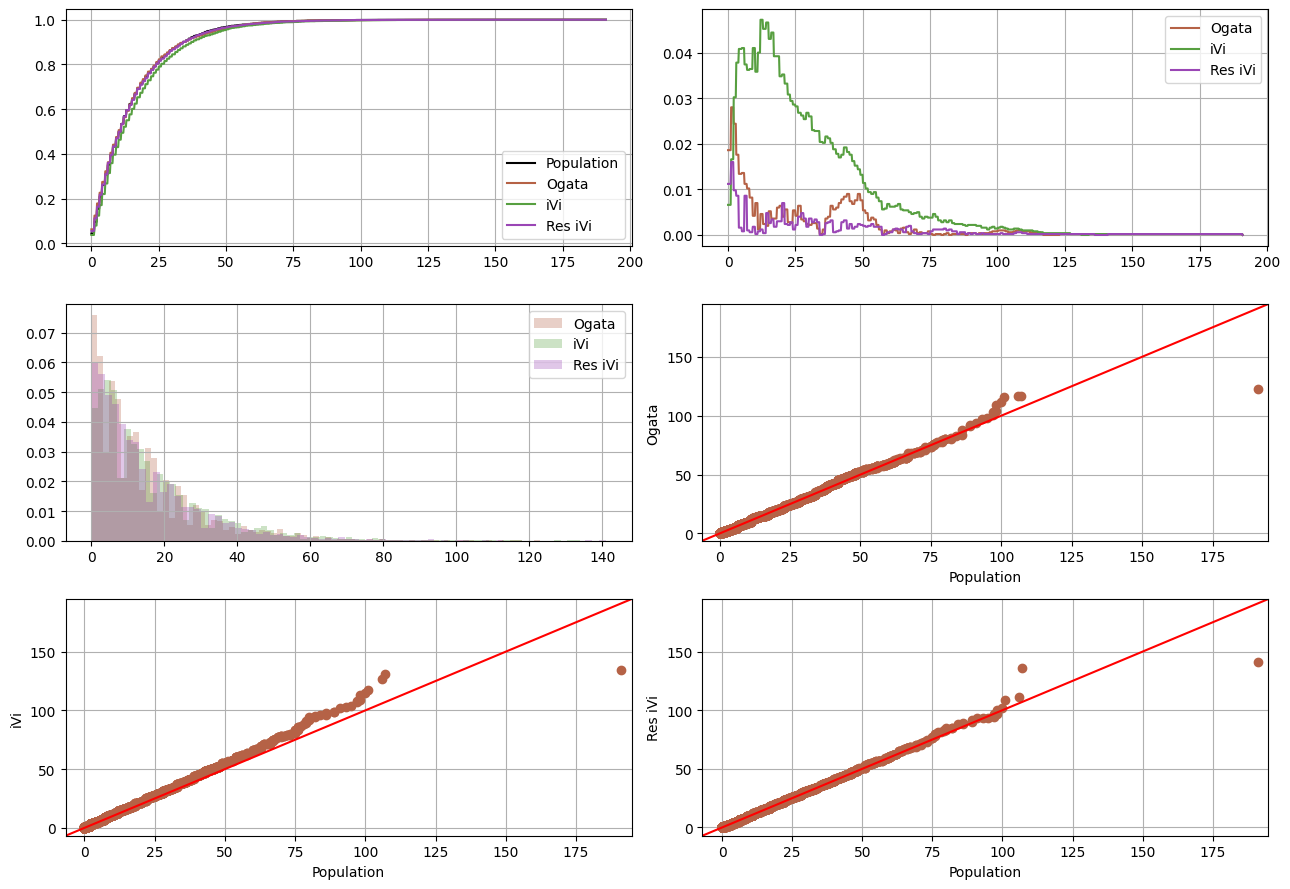

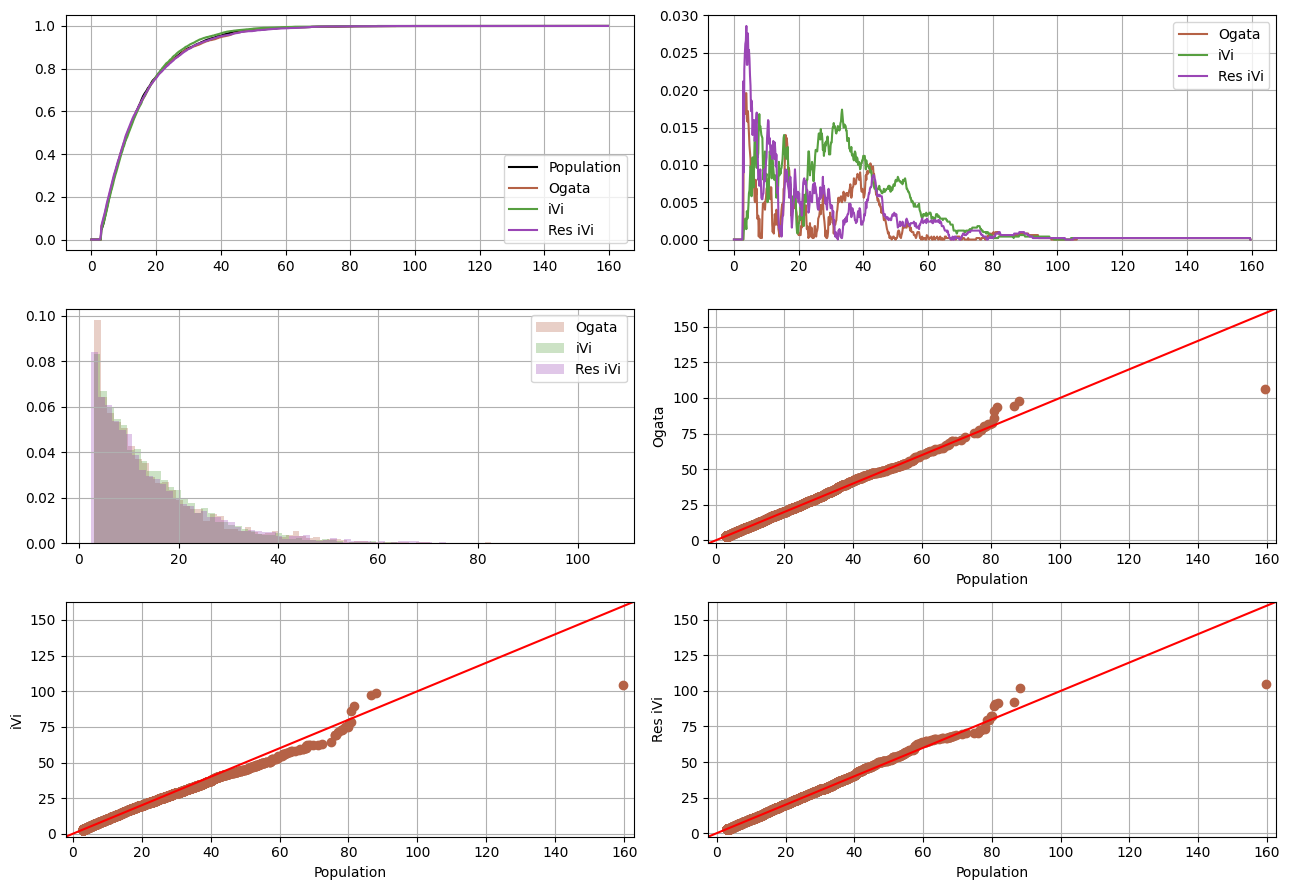

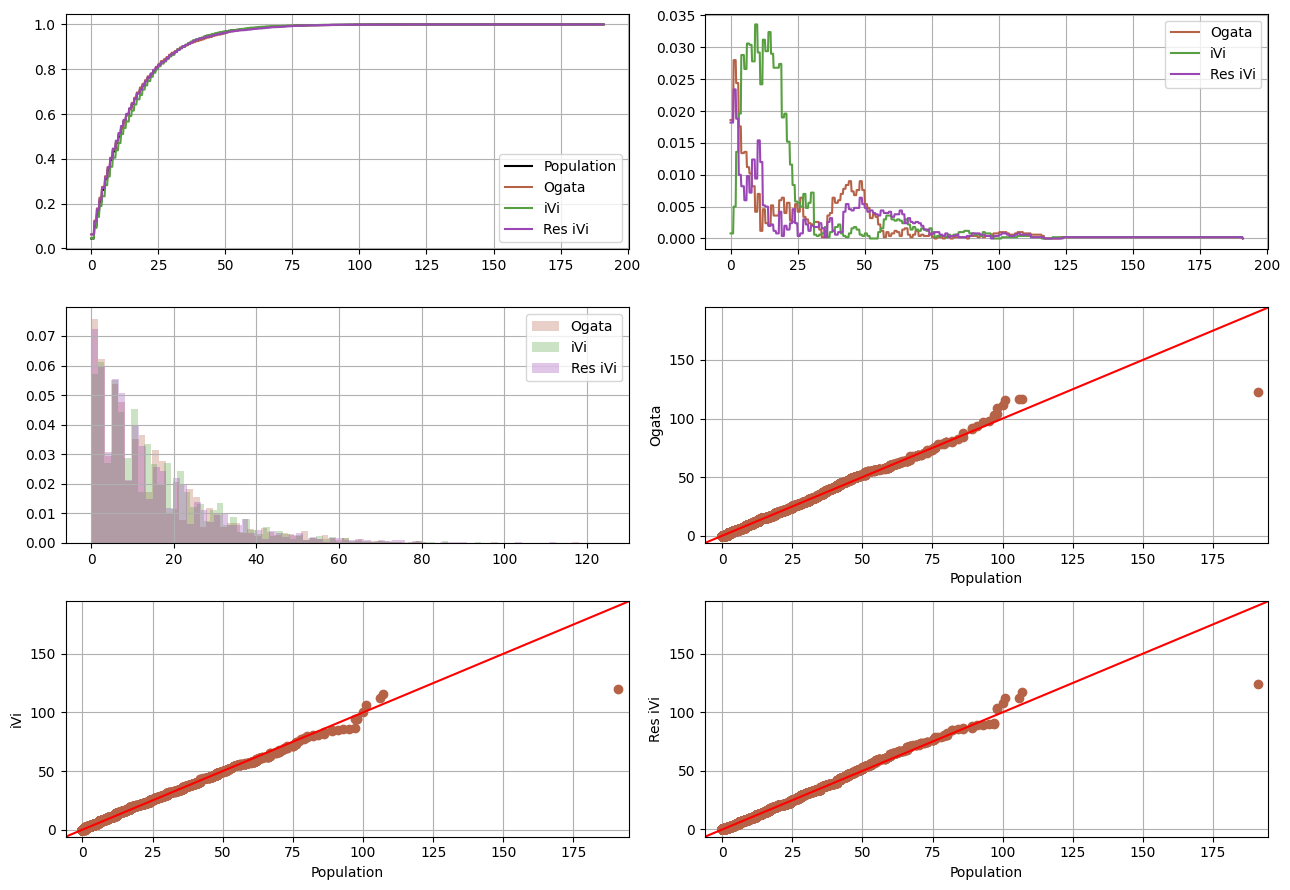

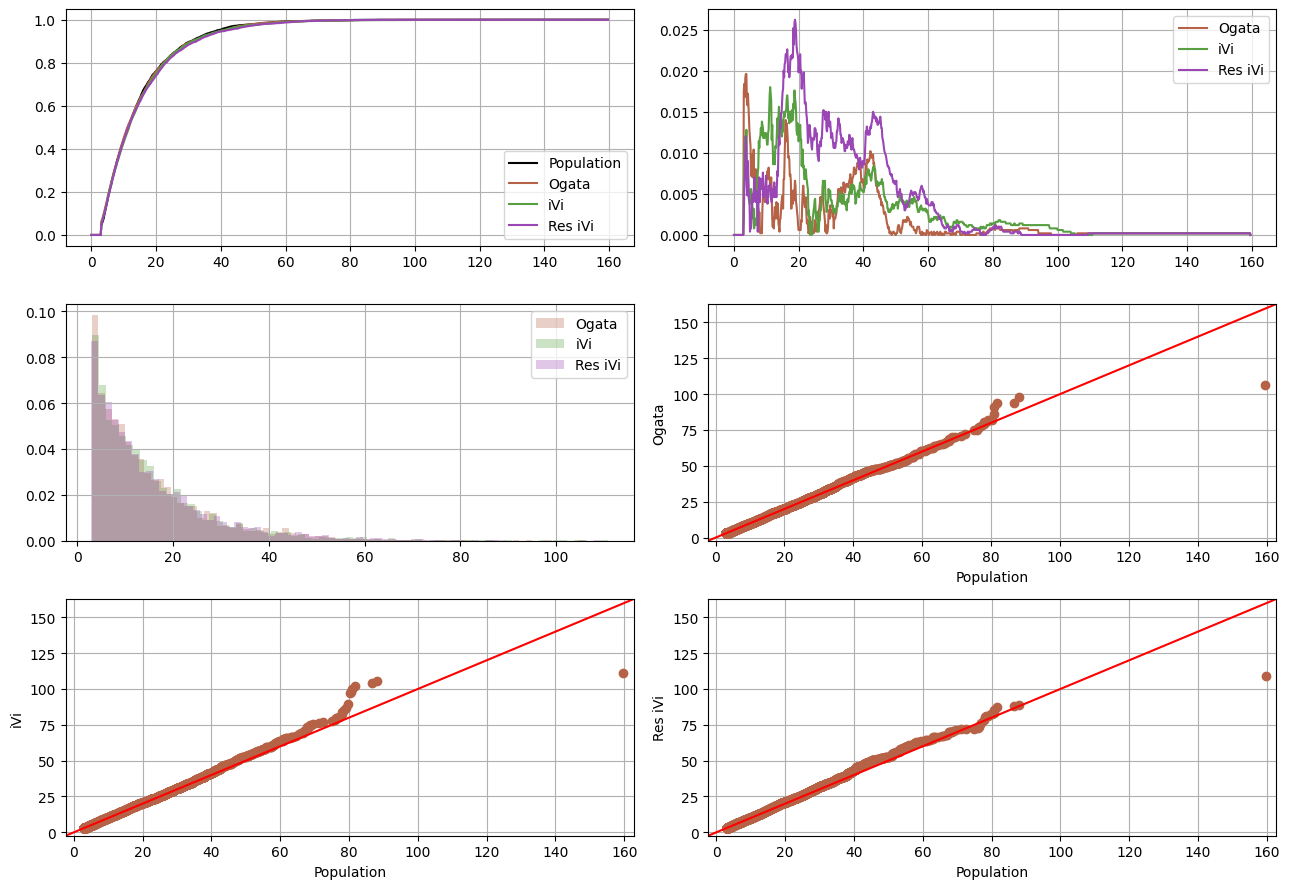

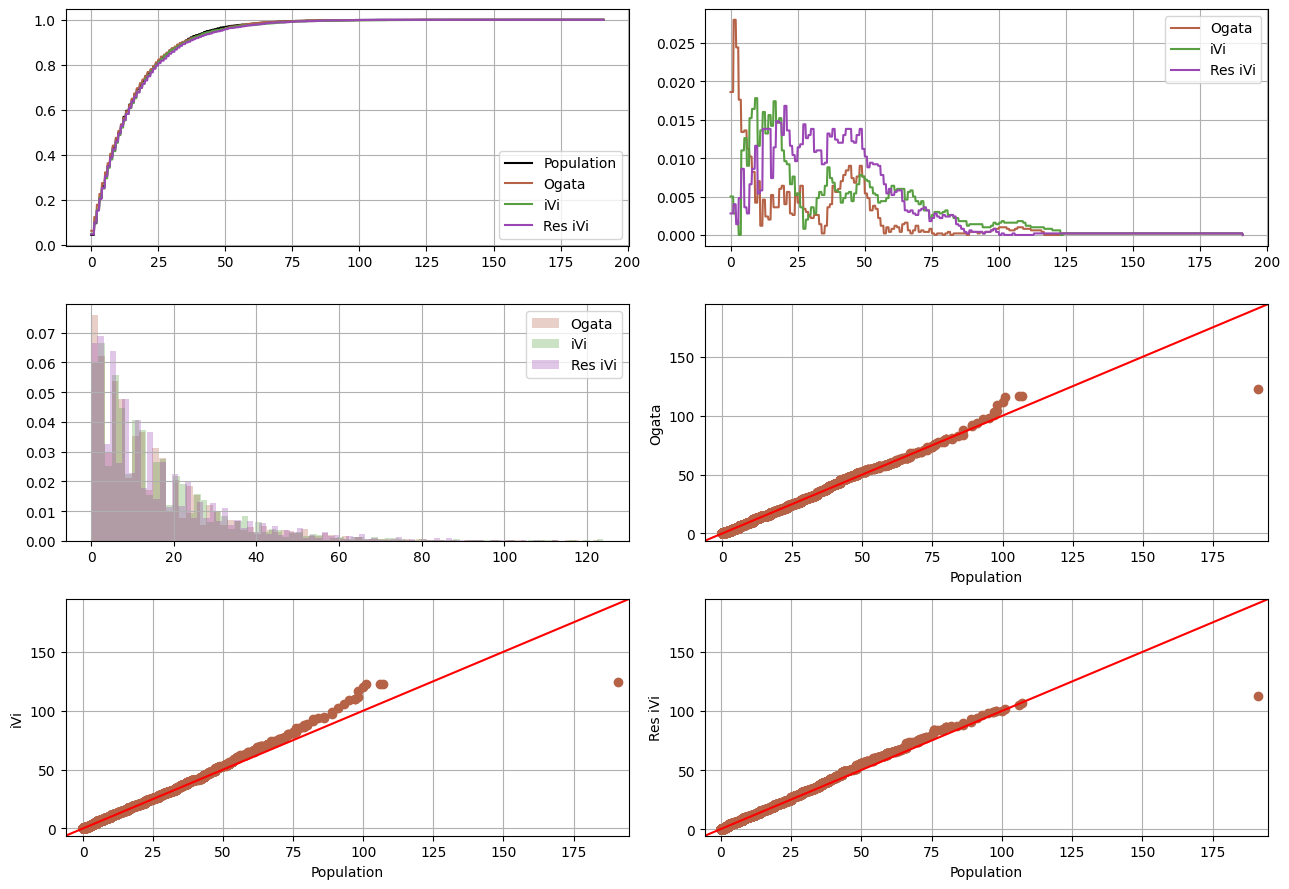

In [44]:
# test 2: marginal laws
n_paths = 5000
n_steps_arr = [e.n_steps, 10, 50, 100, 1000]
methods = ["Population", "Ogata", "iVi", "Res iVi"]

for n_steps in n_steps_arr:
    samples = {method: get_N_U_sample(experiment=e.change_n_steps(n_steps), method=method, n_paths=n_paths, return_counters=True) for method in methods}
    experiment_results["U_p_values_" + str(n_steps)] = plot_marginal_laws(samples, "U", path=path_experiment + "marginal_laws_U_" + str(n_steps) + ".pdf")
    experiment_results["N_p_values_" + str(n_steps)] = plot_marginal_laws(samples, "N", path=path_experiment + "marginal_laws_N_" + str(n_steps) + ".pdf")

In [47]:
experiment_results

{'mean_N_T': 15.093149509113466,
 'U_p_values': {'Population-Ogata': (0.1856663803254565, 0.0218),
  'Population-iVi': (0.3035775745288207, 0.0194),
  'Population-Res iVi': (0.03750845908615294, 0.0282)},
 'N_p_values': {'Population-Ogata': (0.039677110232779096, 0.028),
  'Population-iVi': (0.0046883725566174775, 0.0348),
  'Population-Res iVi': (0.020914947385416365, 0.0302)},
 'arriavals_p_values': {'Population': (0.6653568948936559,
   0.13434504716309026),
  'Ogata': (0.7365908753932318, 0.22472286140434983),
  'iVi': (0.5876831498381581, 0.21997600218017022),
  'Res iVi': (0.6222139202958844, 0.23508032608823654)},
 'U_p_values_1000': {'Population-Ogata': (0.1856663803254565, 0.0218),
  'Population-iVi': (0.3035775745288207, 0.0194),
  'Population-Res iVi': (0.03750845908615294, 0.0282)},
 'N_p_values_1000': {'Population-Ogata': (0.039677110232779096, 0.028),
  'Population-iVi': (0.0046883725566174775, 0.0348),
  'Population-Res iVi': (0.020914947385416365, 0.0302)},
 'U_p_values

Reference value: 0.8658879276495034
Reference value: 0.8688584286207461


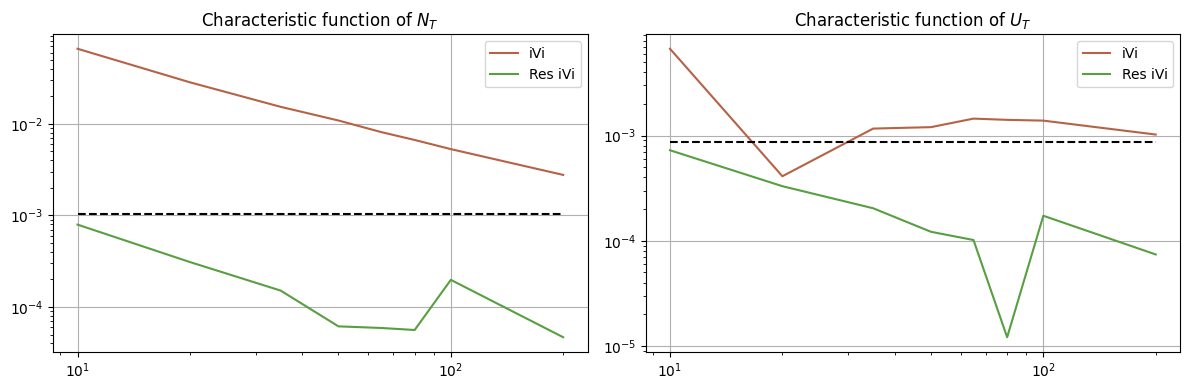

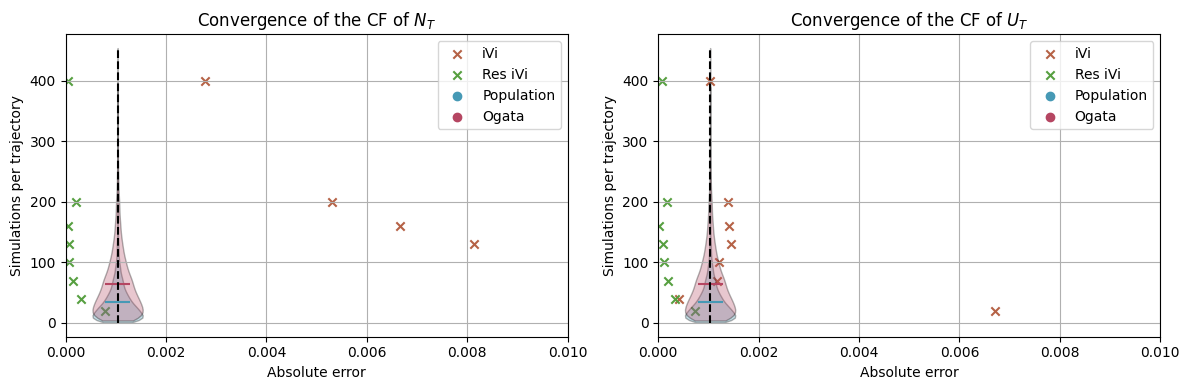

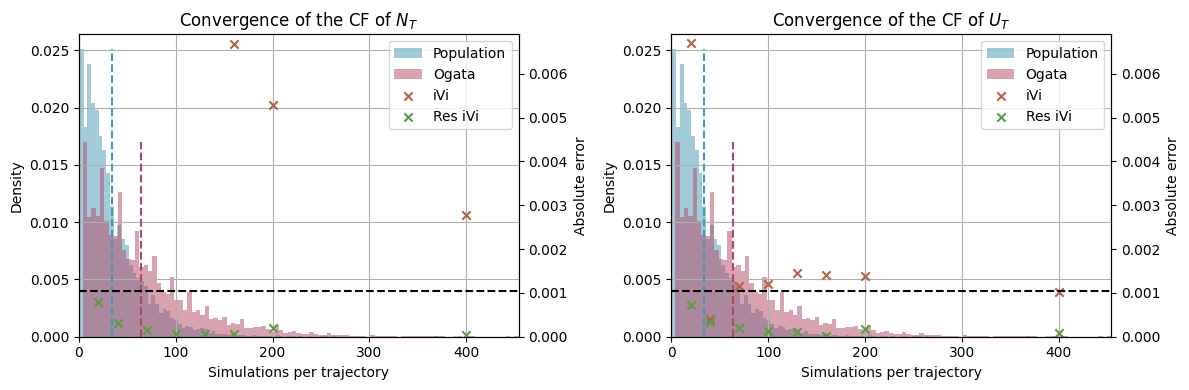

In [23]:
# test 3: convergence of the CF
methods_ivi = ["iVi", "Res iVi"]
n_steps_arr = [10, 20, 35, 50, 65, 80, 100, 200]
n_paths = 1_000_000
experiments = [e.change_n_steps(n_steps=n_steps) for n_steps in n_steps_arr]
samples = {(method, e.n_steps): get_N_U_sample(experiment=e, method=method, n_paths=n_paths, return_counters=True)
           for method, e in product(methods_ivi, experiments)}

methods_non_ivi = ["Population", "Ogata"]
n_paths_non_ivi = 10_000
samples_non_ivi = {method: get_N_U_sample(experiment=experiments[-1], method=method, n_paths=n_paths_non_ivi, return_counters=True)
                   for method in methods_non_ivi}

w = -0.01
fun = lambda x: np.exp(w * x)
cf_ref = {}

for mode in ["U", "N"]:
    idx = 1 if mode == "U" else 0

    rng = np.random.default_rng(seed=42)
    ivi = IVIHawkesProcess(kernel=experiments[-1].kernel, g0_bar=experiments[-1].g0_bar, rng=rng,
                           g0=experiments[-1].g0, resolvent_flag=False)
    cf_ref[mode] = ivi.characteristic_function(T=experiments[-1].T, w=w, n_steps=10000, mode=mode)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
errors_ivi = {}
for mode in ["U", "N"]:
    idx = 1 if mode == "U" else 0
    print("Reference value:", cf_ref[mode])

    mc_std = 3 * fun(samples_non_ivi["Population"][idx][:, -1]).std() / np.sqrt(n_paths)

    errors_ivi[mode] = {}
    methods = ["iVi", "Res iVi"]

    for method in methods:
        errors_ivi[mode][method]  = []
        for e in experiments:
            U = samples[(method, e.n_steps)][idx]
            errors_ivi[mode][method].append(np.abs(cf_ref[mode] - fun(U[:, -1]).mean()))
        ax[idx].loglog(n_steps_arr, errors_ivi[mode][method], label=method)
    ax[idx].hlines(y=3 * mc_std, xmin=n_steps_arr[0], xmax=n_steps_arr[-1], color="k", linestyles="--")
    ax[idx].set_title(f"Characteristic function of ${mode}_T$")
    ax[idx].legend()
fig.savefig(path_experiment + "CF_convergence_1.pdf", format="pdf", bbox_inches="tight", transparent=True)


fig, ax_arr = plt.subplots(1, 2, figsize=(12, 4))
for mode in ["U", "N"]:
    idx = 1 if mode == "U" else 0
    ax = ax_arr[idx]
    for method in methods:
        ax.scatter(errors_ivi[mode][method], 2 * np.array(n_steps_arr), marker="x", label=method)

    for method, color in zip(methods_non_ivi, color_cycle[3:]):
        error = np.abs(cf_ref[mode] - fun(samples_non_ivi[method][idx][:, -1]).mean())
        parts= ax.violinplot(samples_non_ivi[method][2], positions=[3*mc_std], widths=0.001, showmeans=True, showextrema=False)
        ax.scatter([], [], c=color, label=method)
        for pc in parts['bodies']:
            pc.set_facecolor(color)  # blue fill
            pc.set_edgecolor('black')    # black outline
        parts['cmeans'].set_color(color)

    ax.vlines(x=3*mc_std, ymin=0, ymax=np.max(samples_non_ivi["Ogata"][2]), color="k", linestyles="--")

    ax.legend()
    ax.set_xlim([0, 0.01])
    ax.set_xlabel("Absolute error")
    ax.set_ylabel("Simulations per trajectory")
    ax.set_title(f"Convergence of the CF of ${mode}_T$")
fig.savefig(path_experiment + "CF_convergence_2.pdf", format="pdf", bbox_inches="tight", transparent=True)


fig, ax_arr = plt.subplots(1, 2, figsize=(12, 4))
for mode in ["U", "N"]:
    idx = 1 if mode == "U" else 0
    ax = ax_arr[idx]

    for method, color in zip(methods_non_ivi, color_cycle[3:]):
        error = np.abs(cf_ref[mode] - fun(samples_non_ivi[method][idx][:, -1]).mean())
        hist = ax.hist(samples_non_ivi[method][2], color=color, label=method, density=True, bins=100, alpha=0.5)
        ax.vlines(np.mean(samples_non_ivi[method][2]), 0, hist[0].max(), linestyles="--", color=color)

    ax.set_xlim([0, np.max(samples_non_ivi["Ogata"][2])])

    # Create second y-axis
    ax2 = ax.twinx()

    for method in methods:
        ax2.scatter(2 * np.array(n_steps_arr), errors_ivi[mode][method],  marker="x", label=method)

    ax2.hlines(y=3*mc_std, xmin=0, xmax=np.max(samples_non_ivi["Ogata"][2]), color="k", linestyles="--")
    ax2.set_ylim([0, 20*mc_std])


    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2)
    ax2.grid(False)

    ax.set_xlabel("Simulations per trajectory")
    ax.set_ylabel("Density")

    # ax.set_xlim([0, 0.01])
    ax2.set_ylabel("Absolute error")
    ax.set_title(f"Convergence of the CF of ${mode}_T$")
fig.savefig(path_experiment + "CF_convergence_3.pdf", format="pdf", bbox_inches="tight", transparent=True)

Population
Kolmogorov-Smirnov test p-value:  0.6653568948936559
Ogata
Kolmogorov-Smirnov test p-value:  0.7365908753932318
iVi
Kolmogorov-Smirnov test p-value:  0.5876831498381581
Res iVi
Kolmogorov-Smirnov test p-value:  0.6222139202958844
Population
Kolmogorov-Smirnov test p-value:  0.6653568948936559
Ogata
Kolmogorov-Smirnov test p-value:  0.7365908753932318
iVi
Kolmogorov-Smirnov test p-value:  0.1378294633188475
Res iVi
Kolmogorov-Smirnov test p-value:  0.24202750989461863
Population
Kolmogorov-Smirnov test p-value:  0.6653568948936559
Ogata
Kolmogorov-Smirnov test p-value:  0.7365908753932318
iVi
Kolmogorov-Smirnov test p-value:  0.5233800963489132
Res iVi
Kolmogorov-Smirnov test p-value:  0.528402784736399
Population
Kolmogorov-Smirnov test p-value:  0.6653568948936559
Ogata
Kolmogorov-Smirnov test p-value:  0.7365908753932318
iVi
Kolmogorov-Smirnov test p-value:  0.7598426710559646
Res iVi
Kolmogorov-Smirnov test p-value:  0.8437443183639357
Population
Kolmogorov-Smirnov test p

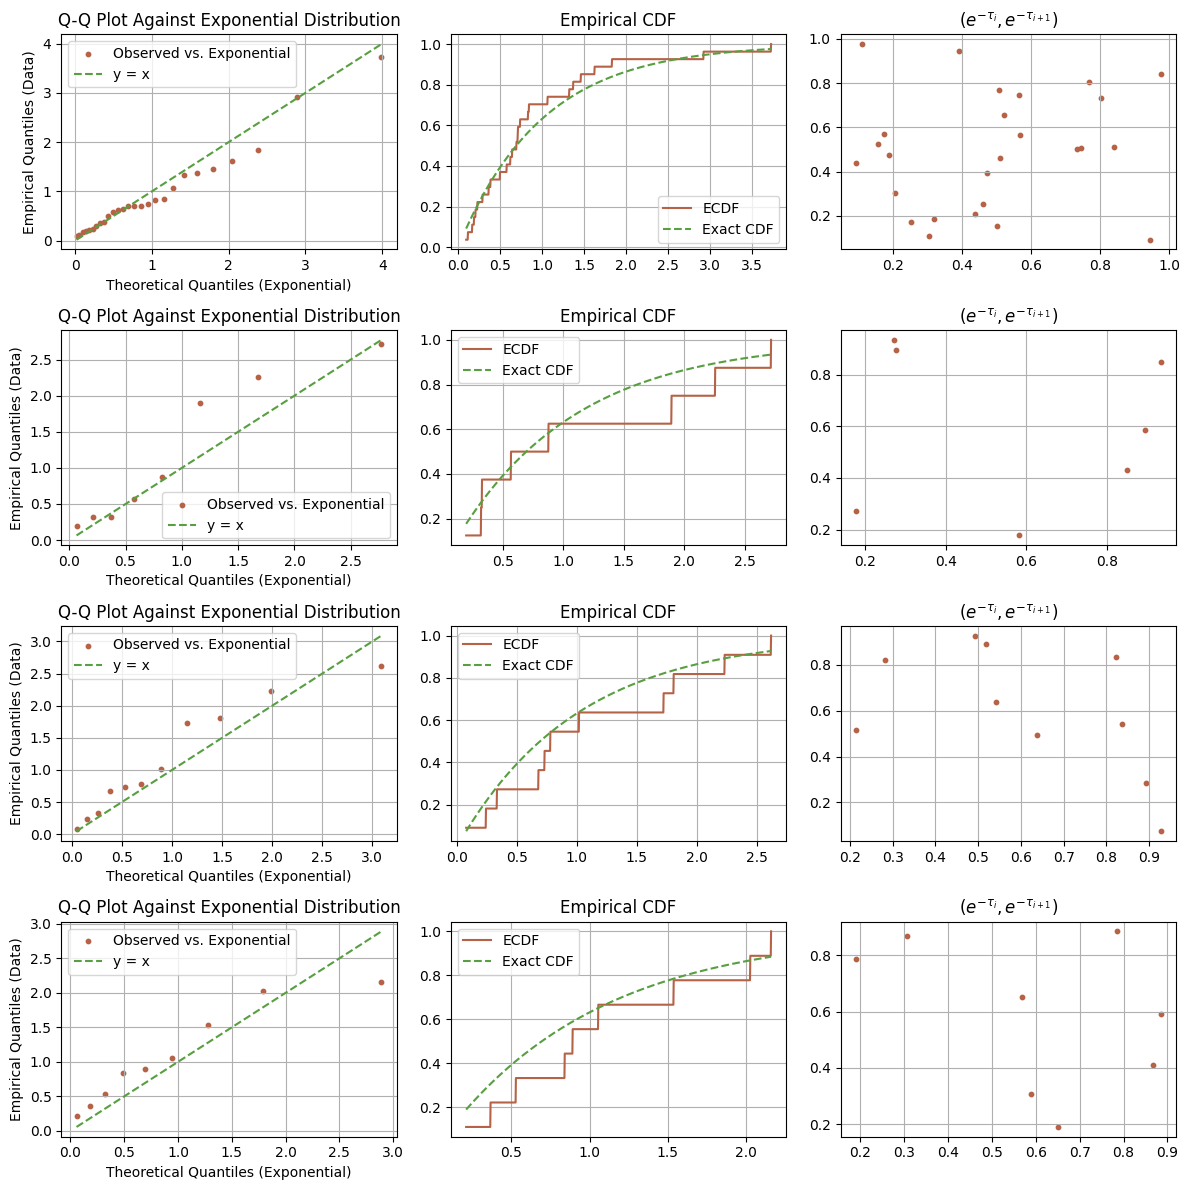

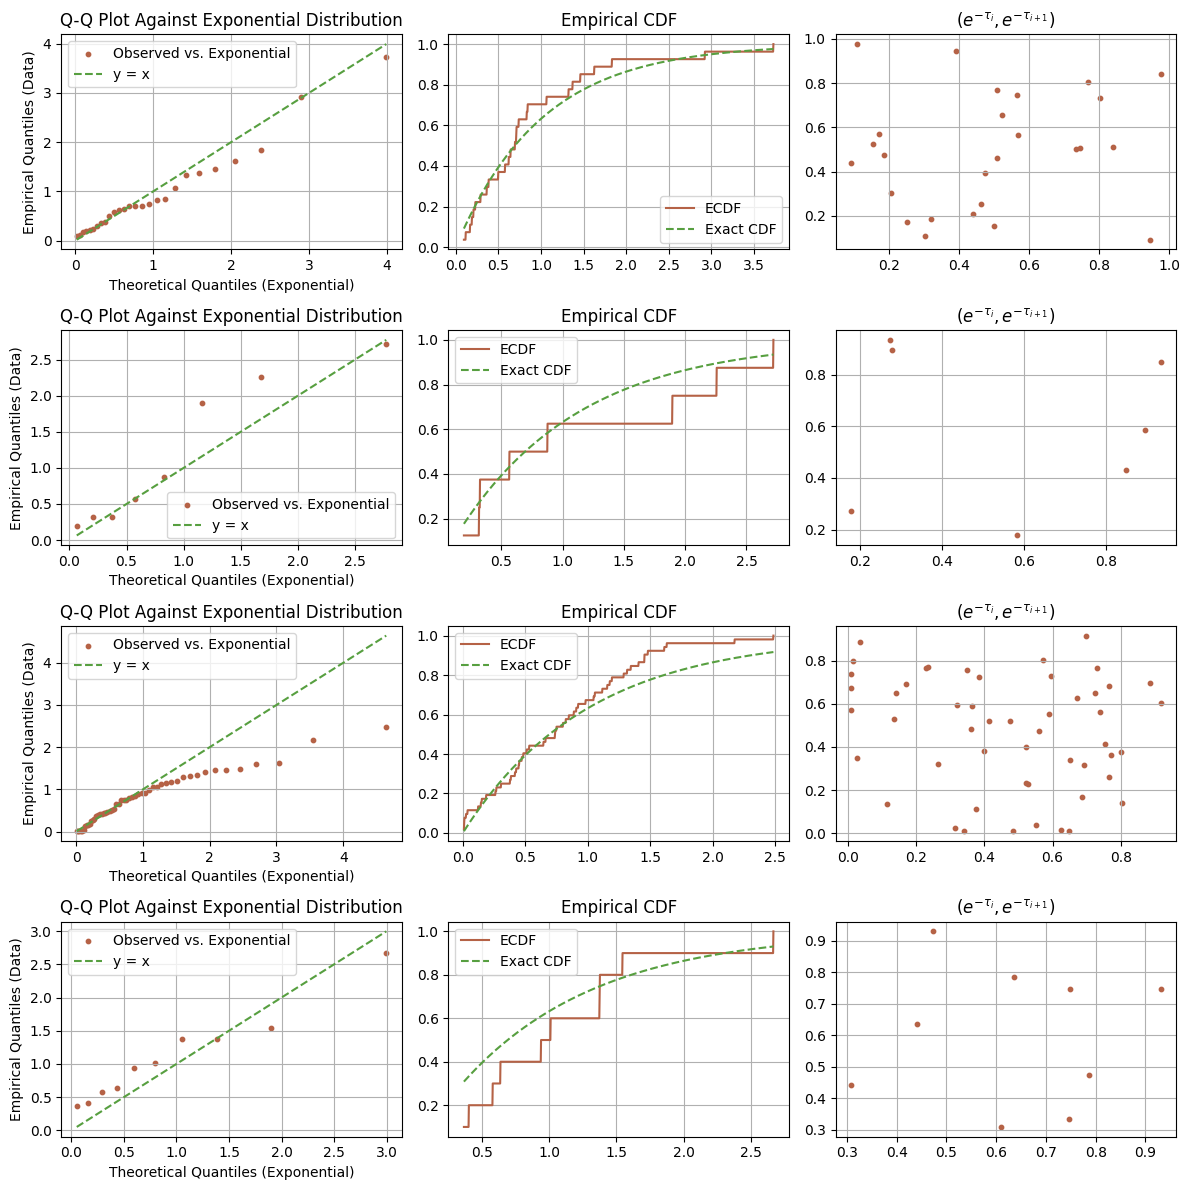

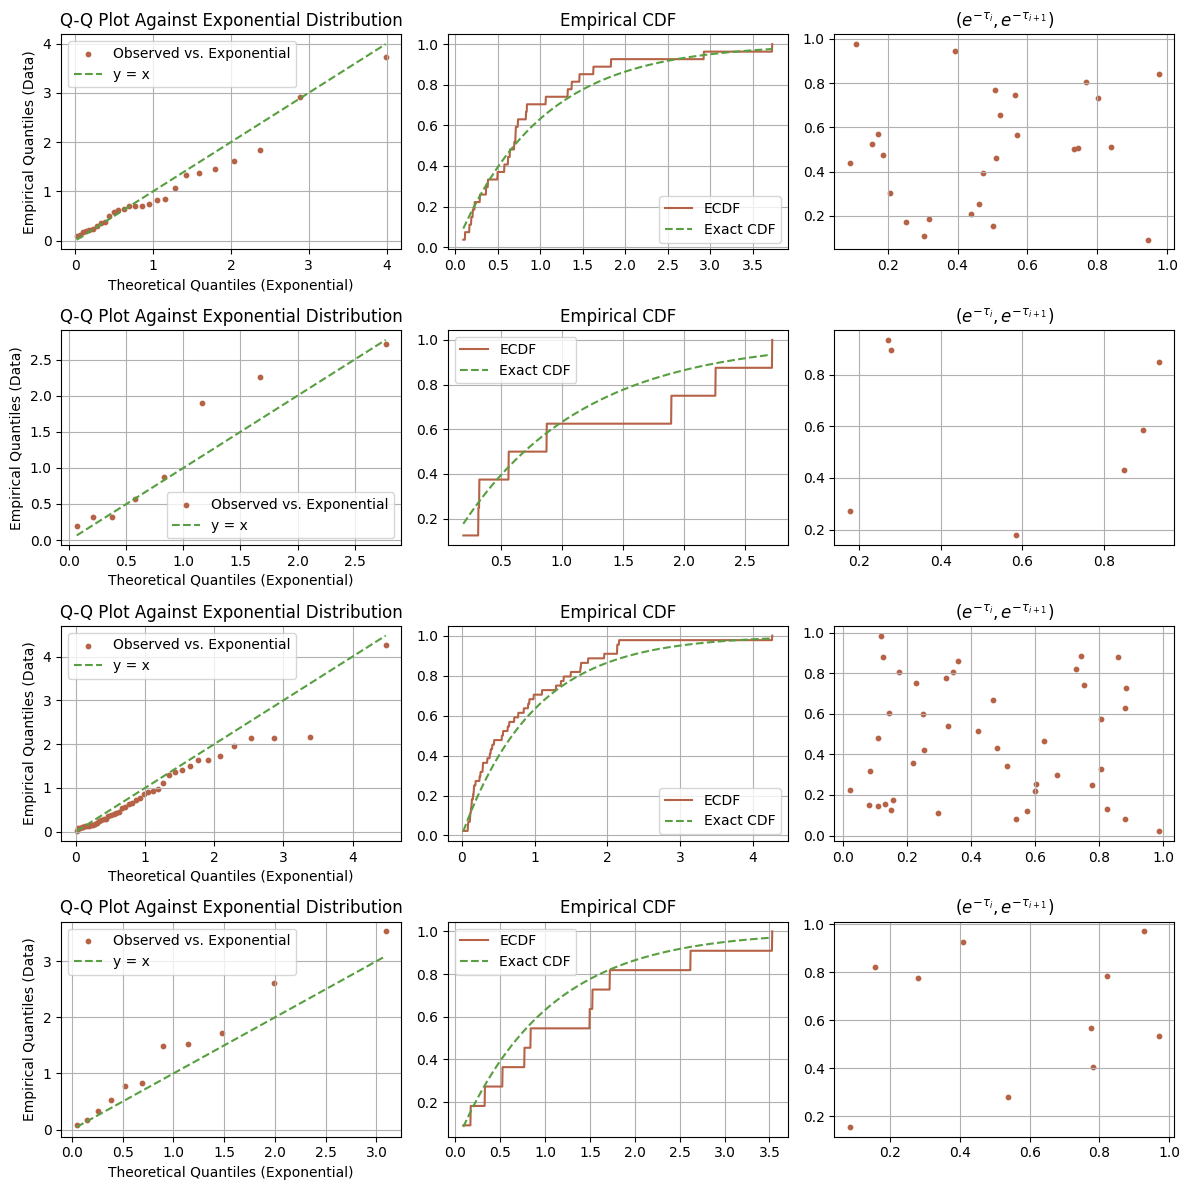

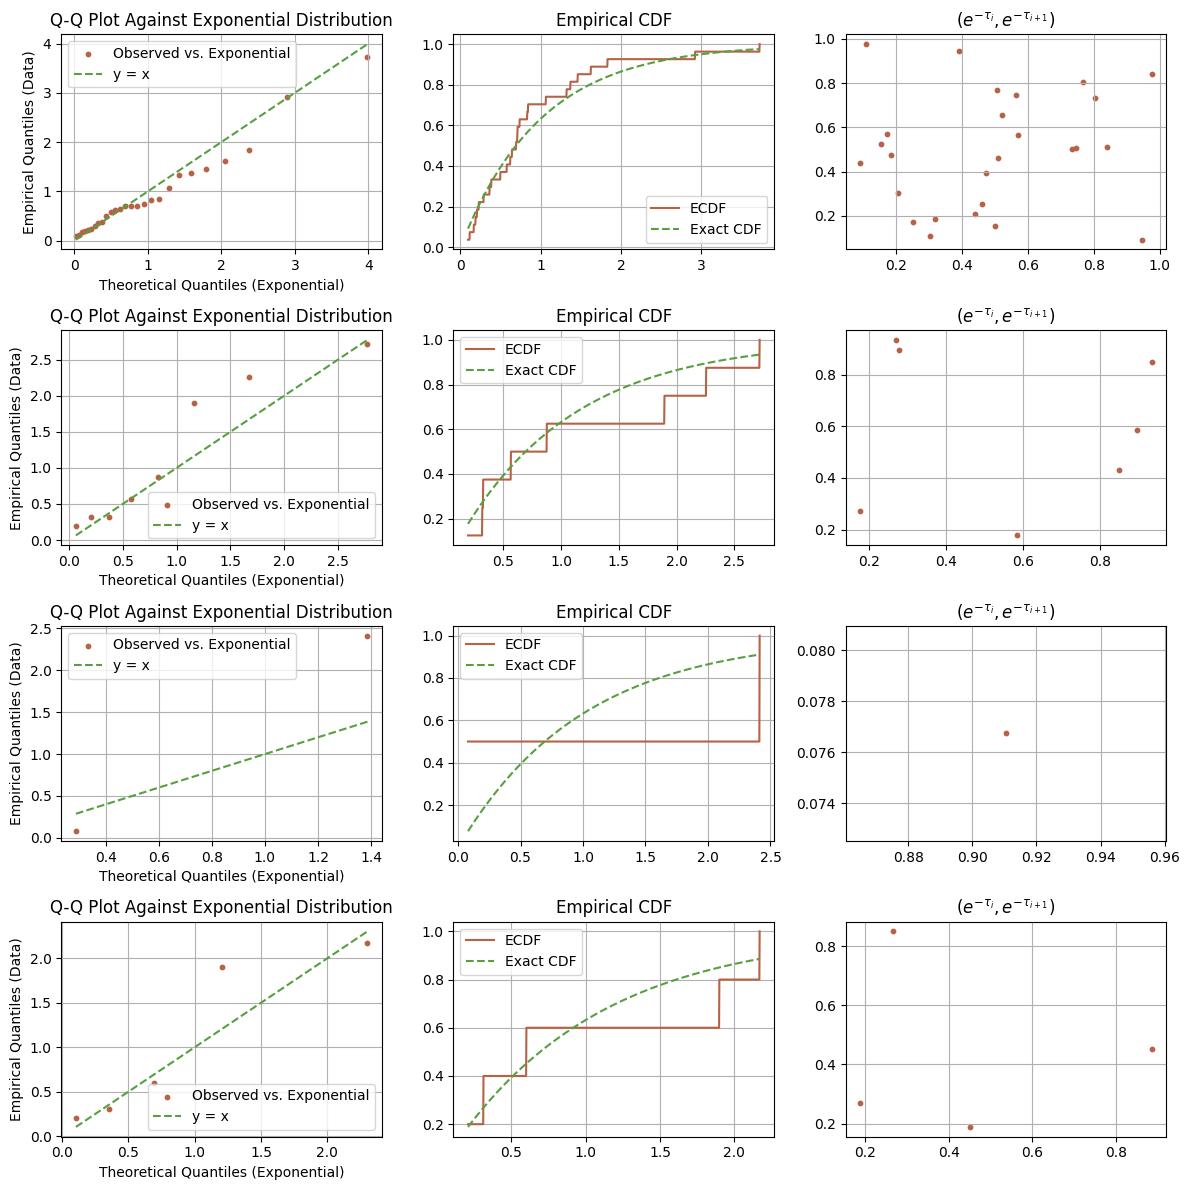

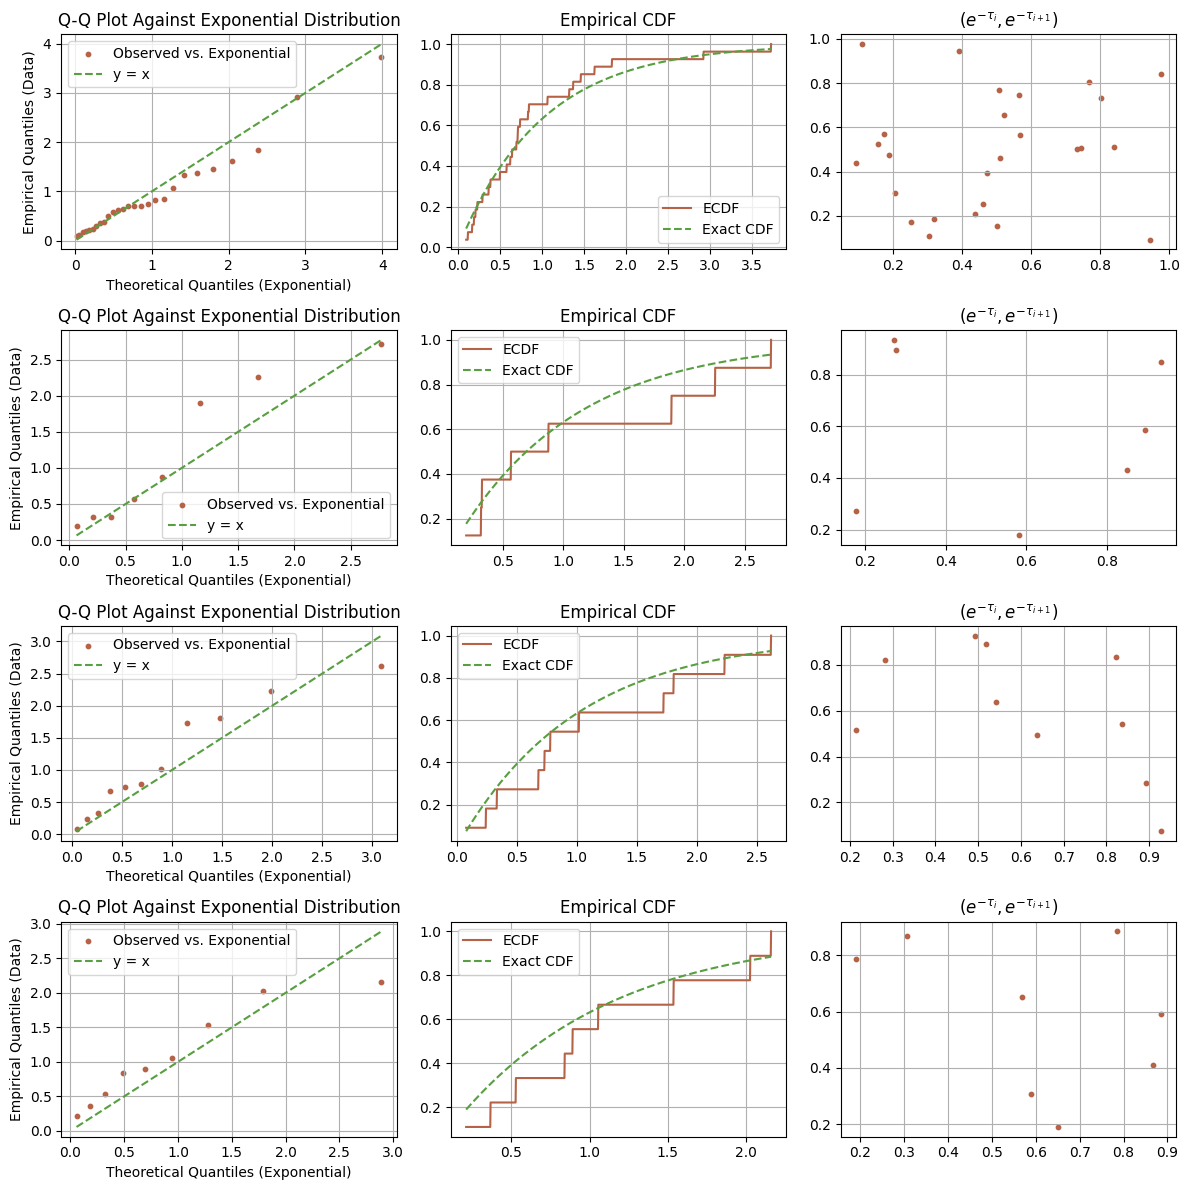

In [50]:
# test 4: sampling arrivals

methods = ["Population", "Ogata", "iVi", "Res iVi"]
n_steps_arr = [e.n_steps, 10, 50, 100, 1000]
for n_steps in n_steps_arr:
    rng = np.random.default_rng(seed=42)
    experiment_results["arriavals_p_values_" + str(n_steps)] = dict()
    fig, ax = plt.subplots(4, 3, figsize=(12, 3*4))
    for i, method in enumerate(methods):
        samples_arrivals = get_arrivals_sample(experiment=e.change_n_steps(n_steps), method=method, n_paths=1, rng=rng)
        print(method)
        ivi_hawkes = IVIHawkesProcess(kernel=e.kernel, g0_bar=e.g0_bar, rng=rng, g0=e.g0, resolvent_flag=False)
        experiment_results["arriavals_p_values_" + str(n_steps)][method] = poisson_jumps_test(ivi_hawkes.U_from_jumps(samples_arrivals[0],
                                                                                                      samples_arrivals[0]),
                                                                              ax=ax[i])
    fig.savefig(path_experiment + "arrivals_" + str(n_steps) + ".pdf", format="pdf", bbox_inches="tight", transparent=True)

In [52]:
# saving the results
with open(path_experiment + 'results.json', 'w') as f:
    json.dump(experiment_results, f)